In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from getdata import DataSlicer
from tabulate import tabulate
import scipy.stats as stats
import random

from scipy.stats import pearsonr
from scipy.stats import spearmanr
from tabulate import tabulate
import torch

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv(r"C:\phaseII\static\\survey-first-2020.csv")

In [12]:
def input_features(df):
    '''Transforms gender to numeric values'''
    gender_mapping = {'Male': 1, 'Female': 2, 'Non-binary': 0}
    df['gender'] = df['gender'].replace(gender_mapping)
    features = df.iloc[:, :-12]
    return df, features
# Call function features
df, features = input_features(df)

In [9]:
def perform_regression(x, y):
    # Fit the multiple linear regression model
    model = sm.OLS(y, sm.add_constant(x))
    results = model.fit()

    # Print the regression summary
    print(results.summary())
    print()

    # Extract the coefficient and standard error for each variable
    coefficients = results.params[1:]
    standard_errors = results.bse[1:]

    # Create a dataframe to display the coefficients and standard errors
    coefficients_df = pd.DataFrame({'Coefficient': coefficients, 'Standard Error': standard_errors})
    coefficients_df.index = x.columns
    print(coefficients_df)
    print()

    # Calculate the predicted values
    predicted_values = results.fittedvalues
    
    # Plot the coefficients with error bars
    fig, ax = plt.subplots(figsize=(6, 8))
    x_pos = range(len(coefficients))
    ax.barh(x_pos, coefficients, xerr=standard_errors, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_yticks(x_pos)
    ax.set_yticklabels(coefficients.index)
    ax.set_xlabel('Coefficient')
    ax.set_ylabel('Variable')
    ax.set_title('Coefficients with Standard Errors')
    plt.tight_layout()
    plt.show()

    # Plot the predicted values against the actual values
    plt.scatter(y, predicted_values)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()

    # Histogram of residuals
    plt.hist(results.resid, bins='auto', alpha=0.7)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals')
    plt.show()

    # Q-Q plot of residuals
    stats.probplot(results.resid, dist="norm", plot=plt)
    plt.title("Q-Q plot of Residuals")
    plt.show()

    # Plot the residuals against the index 
    plt.scatter(range(len(results.resid)), results.resid)
    plt.xlabel('Index')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Index')
    plt.show()

    return results, coefficients, standard_errors, predicted_values


## Results Social Proof

                            OLS Regression Results                            
Dep. Variable:           social_proof   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     3.772
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           3.07e-06
Time:                        20:32:54   Log-Likelihood:                -2215.6
No. Observations:                1022   AIC:                             4461.
Df Residuals:                    1007   BIC:                             4535.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.4134    

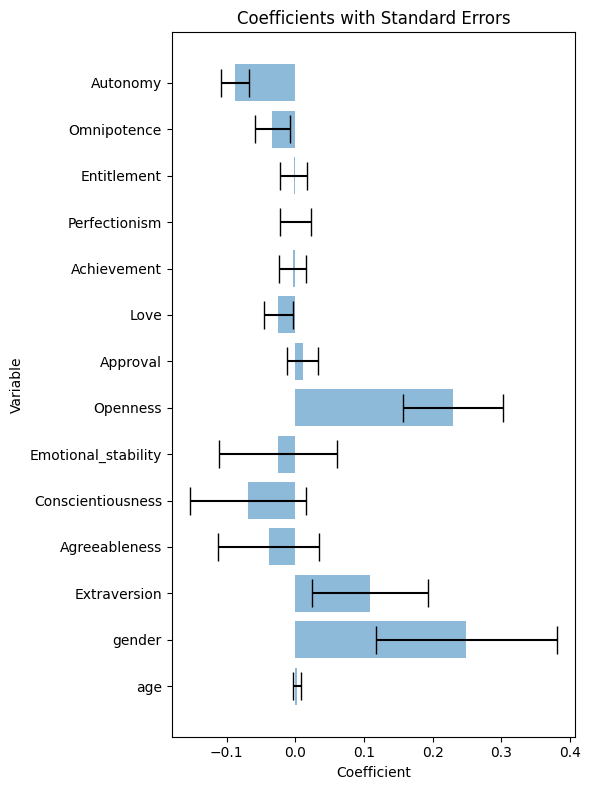

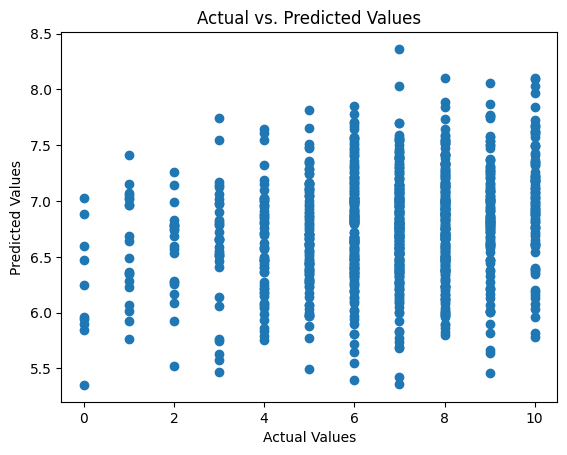

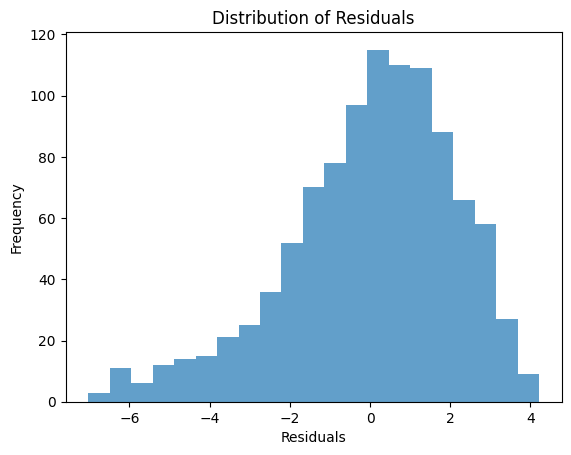

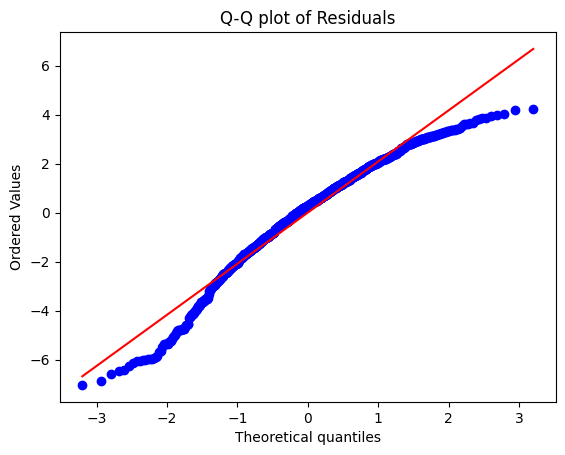

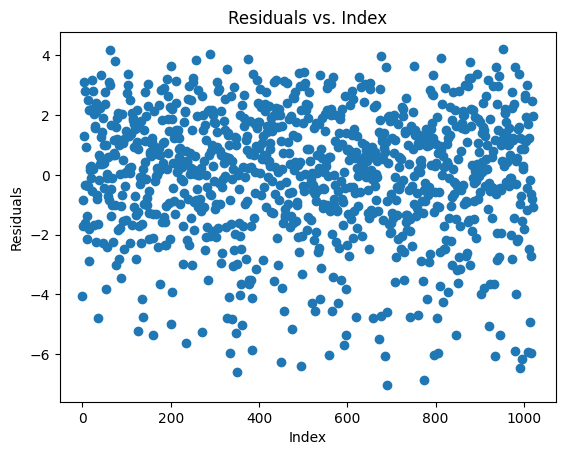

In [19]:
x = features
y = df['social_proof']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

## Results Authority

                            OLS Regression Results                            
Dep. Variable:              authority   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.070
Date:                Wed, 21 Jun 2023   Prob (F-statistic):             0.0113
Time:                        20:36:19   Log-Likelihood:                -2245.0
No. Observations:                1022   AIC:                             4520.
Df Residuals:                    1007   BIC:                             4594.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.2667    

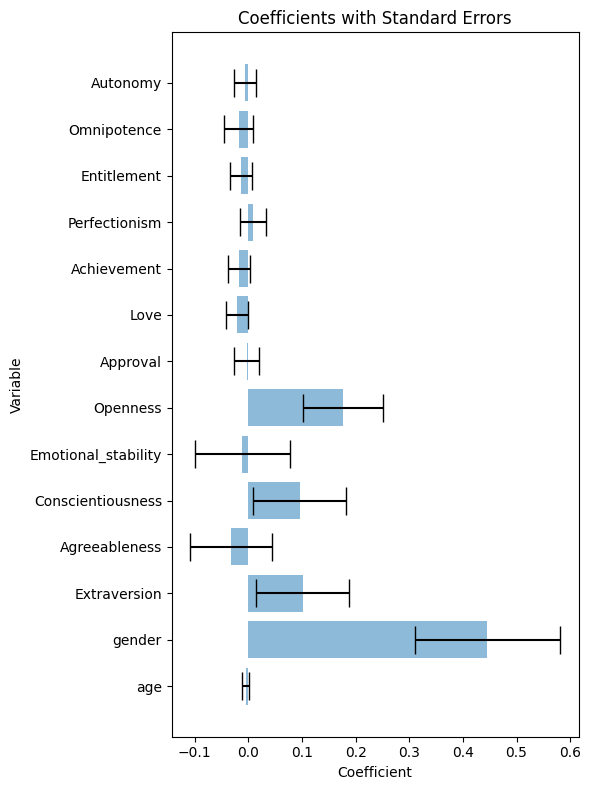

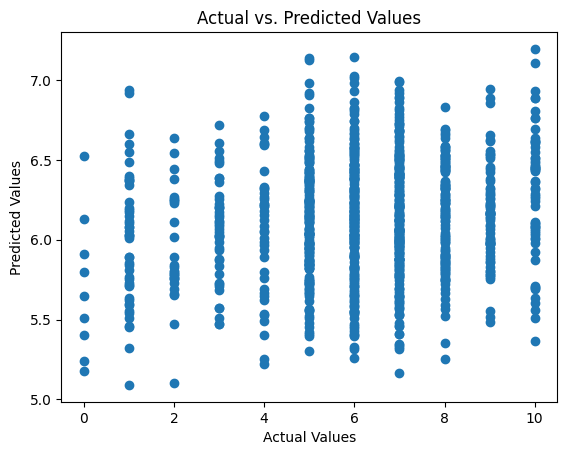

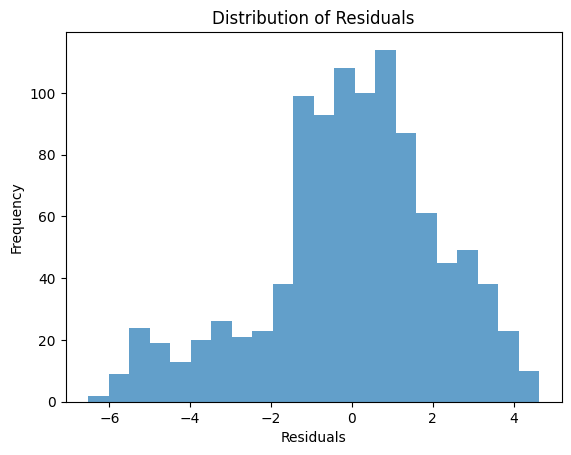

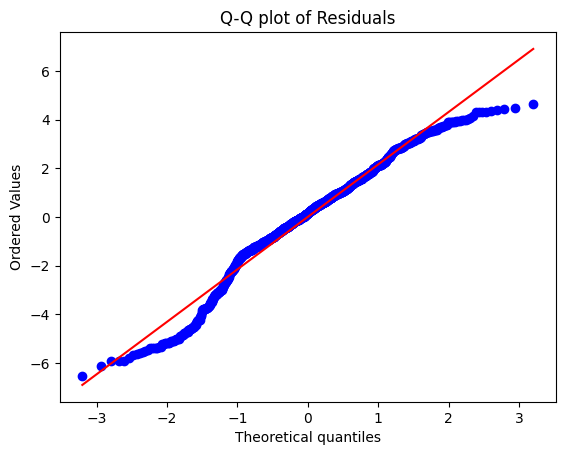

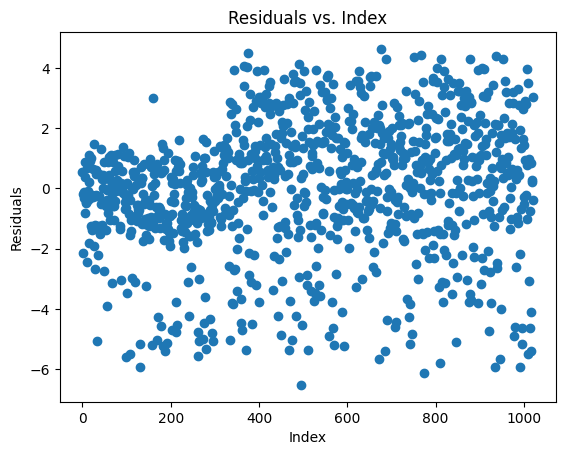

In [22]:

y = df['authority']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

## Results Appeal to Finances

                            OLS Regression Results                            
Dep. Variable:        appeal_finances   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     5.456
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           3.51e-10
Time:                        20:41:47   Log-Likelihood:                -2406.4
No. Observations:                1022   AIC:                             4843.
Df Residuals:                    1007   BIC:                             4917.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.9836    

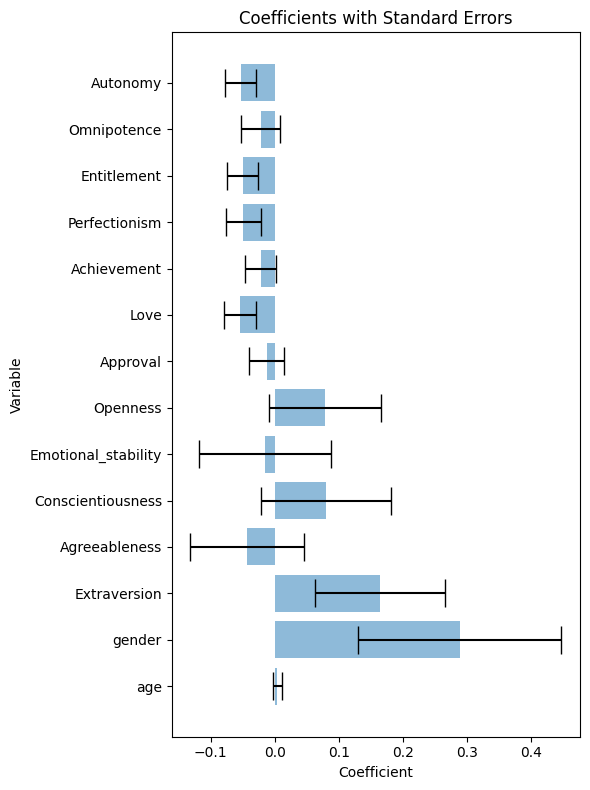

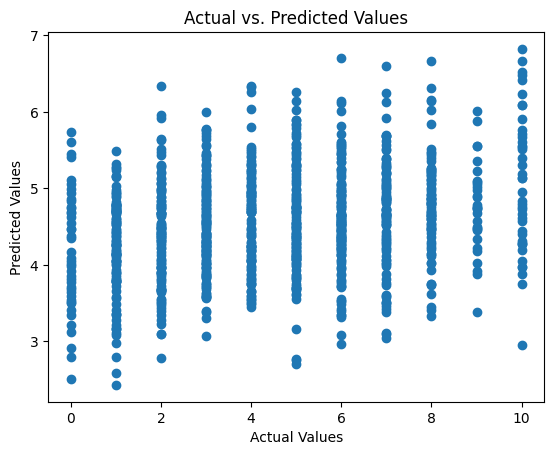

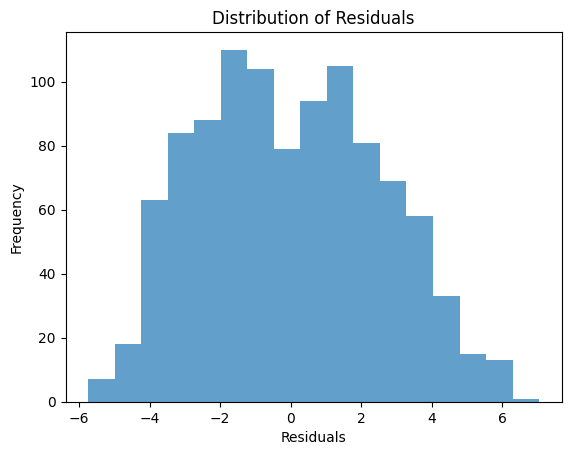

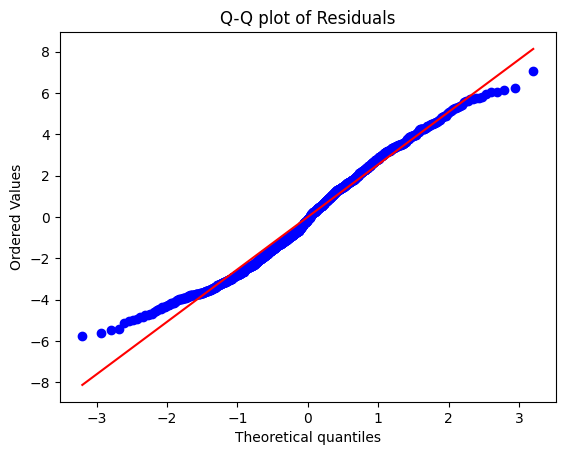

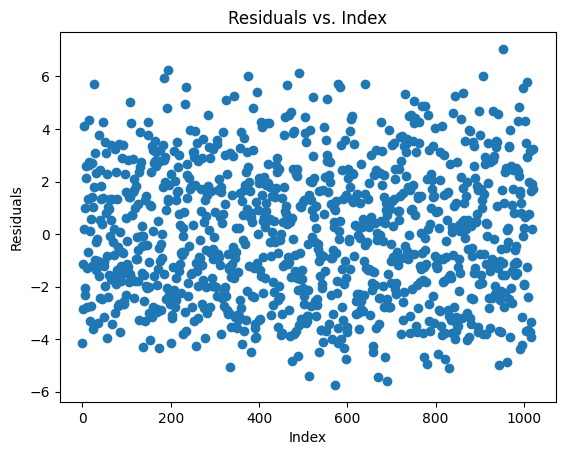

In [24]:

y = df['appeal_finances']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

## Results Awareness Words

                            OLS Regression Results                            
Dep. Variable:        awareness_words   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     5.406
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           4.64e-10
Time:                        20:41:56   Log-Likelihood:                -2331.0
No. Observations:                1022   AIC:                             4692.
Df Residuals:                    1007   BIC:                             4766.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.4579    

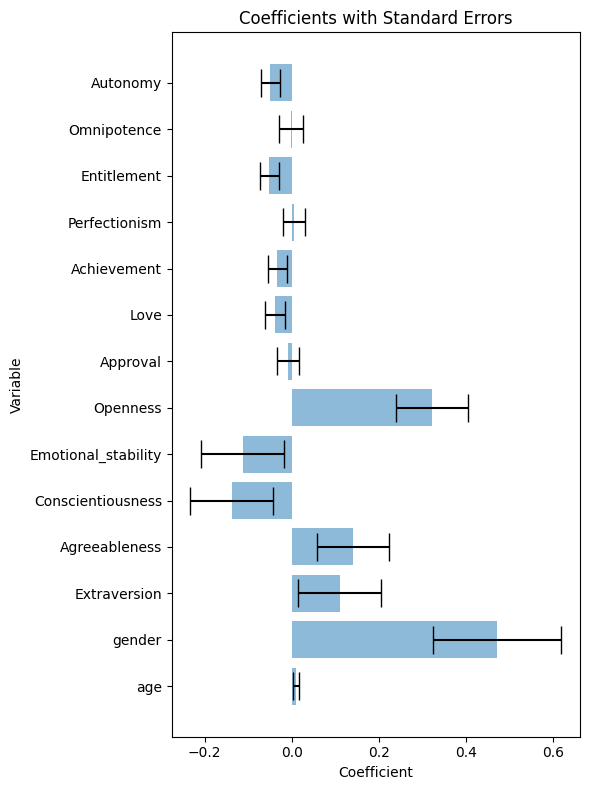

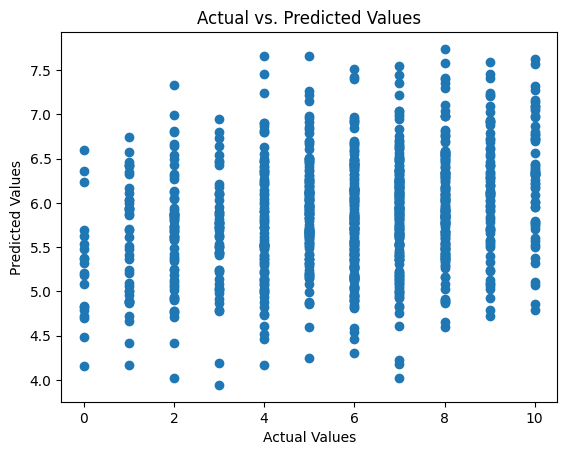

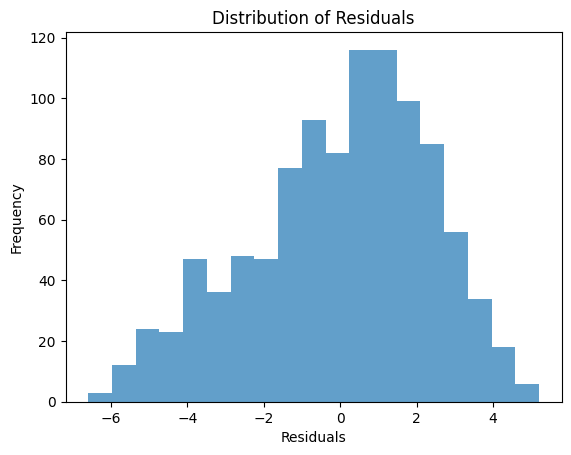

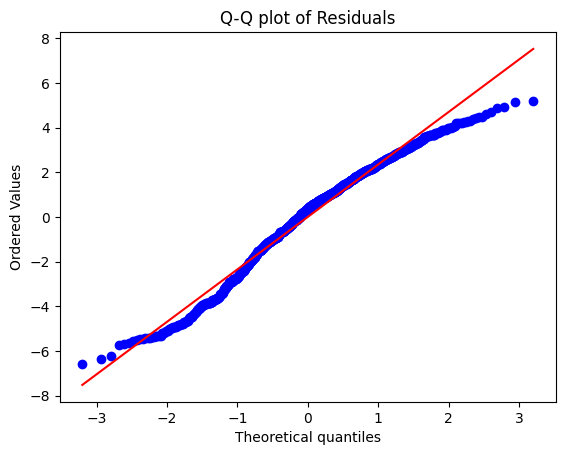

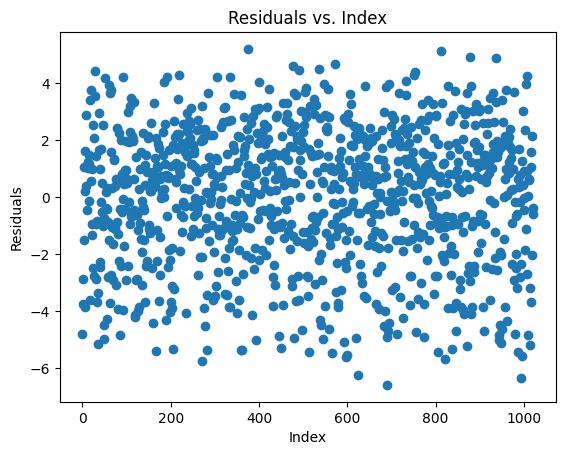

In [25]:
y = df['awareness_words']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

## Semantic Priming

                                 OLS Regression Results                                
Dep. Variable:     semantic_repetition_priming   R-squared:                       0.063
Model:                                     OLS   Adj. R-squared:                  0.050
Method:                          Least Squares   F-statistic:                     4.868
Date:                         Wed, 21 Jun 2023   Prob (F-statistic):           8.84e-09
Time:                                 20:42:08   Log-Likelihood:                -2360.8
No. Observations:                         1022   AIC:                             4752.
Df Residuals:                             1007   BIC:                             4826.
Df Model:                                   14                                         
Covariance Type:                     nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

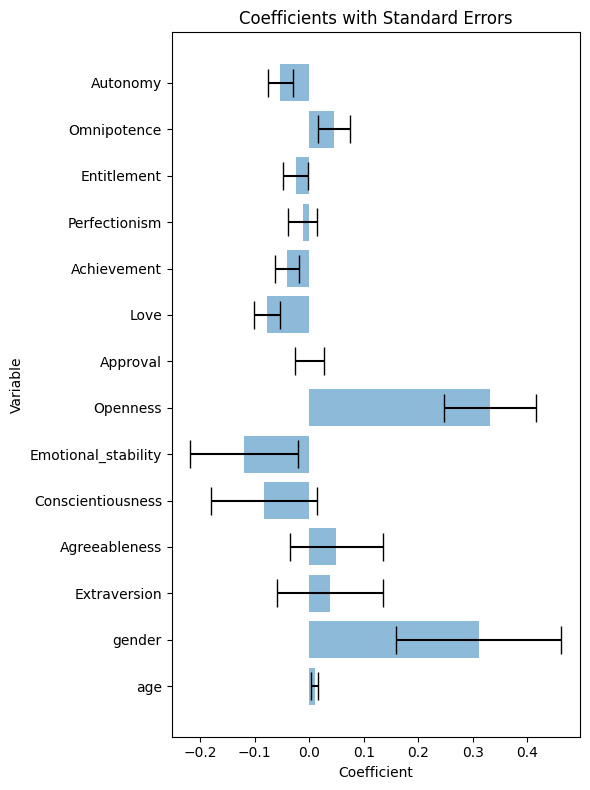

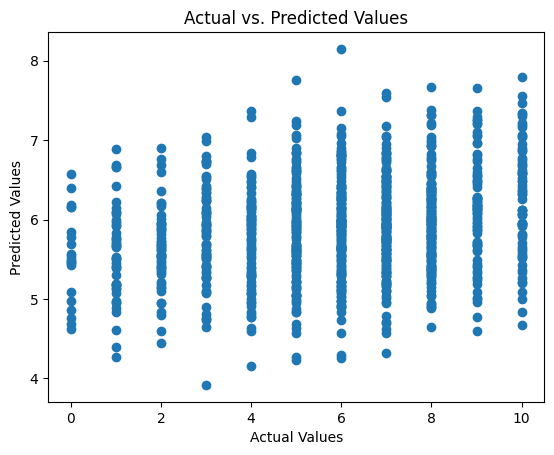

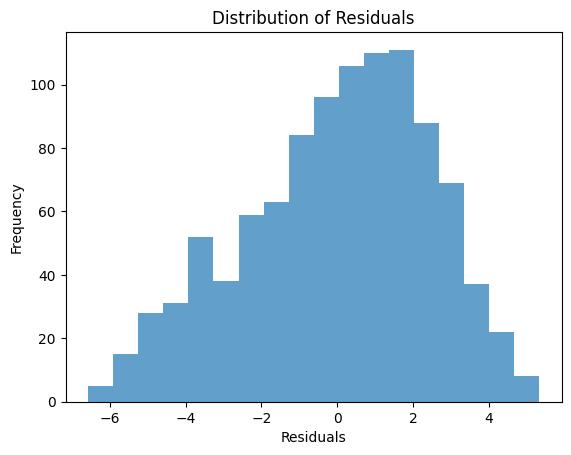

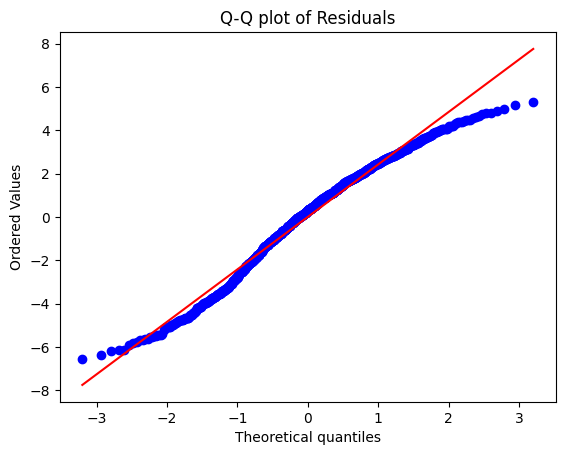

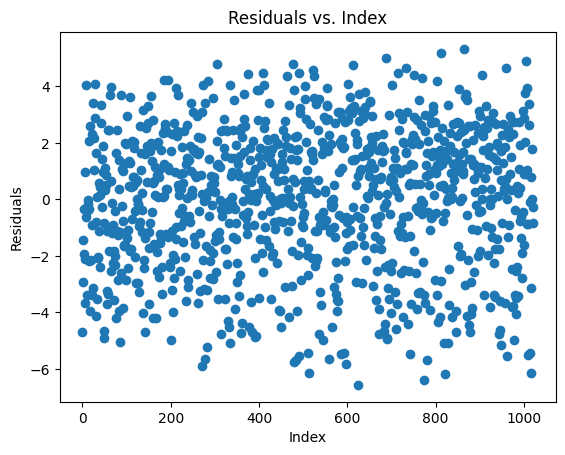

In [26]:
y = df[ 'semantic_repetition_priming']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

## Results Appeal to Logic

In [ ]:
y = df[ 'appeal_to_logic']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

## Results Flattery

                            OLS Regression Results                            
Dep. Variable:               flattery   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     6.834
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           1.63e-13
Time:                        20:55:21   Log-Likelihood:                -2388.1
No. Observations:                1022   AIC:                             4806.
Df Residuals:                    1007   BIC:                             4880.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.2729    

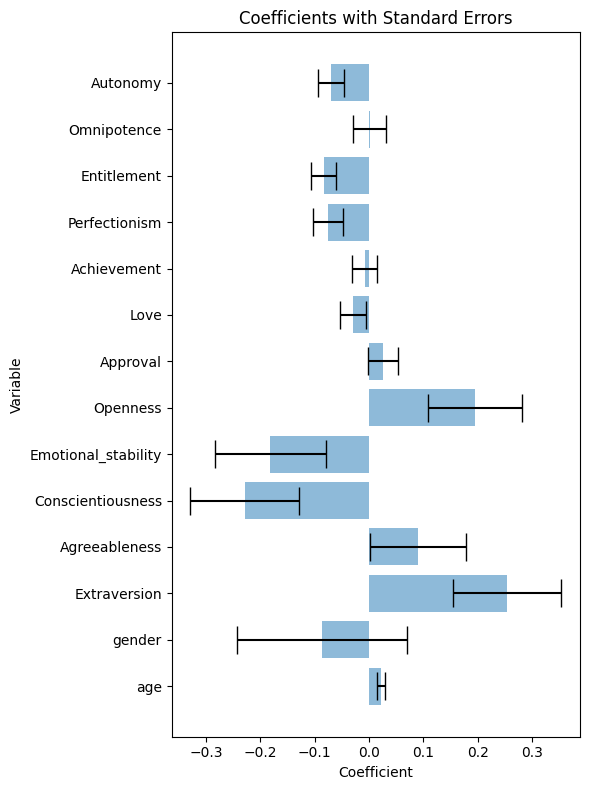

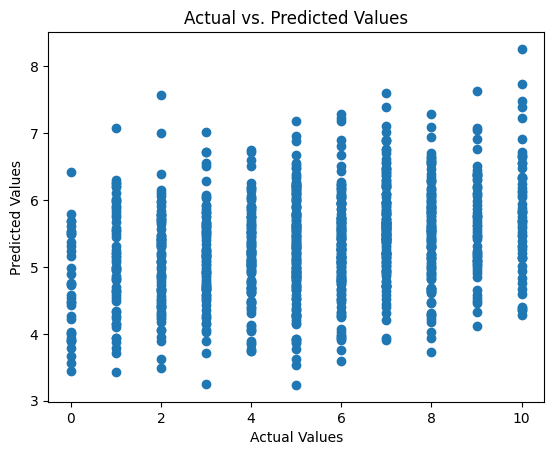

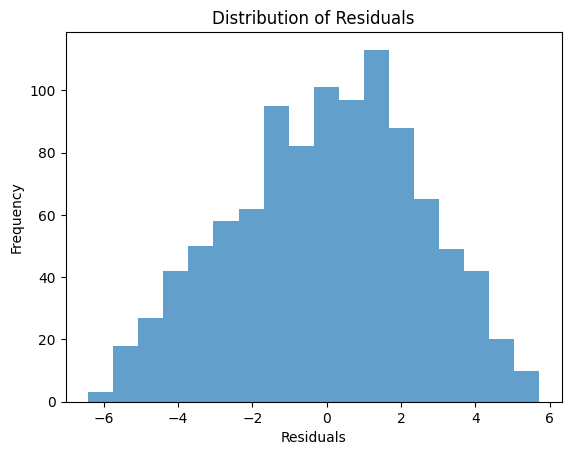

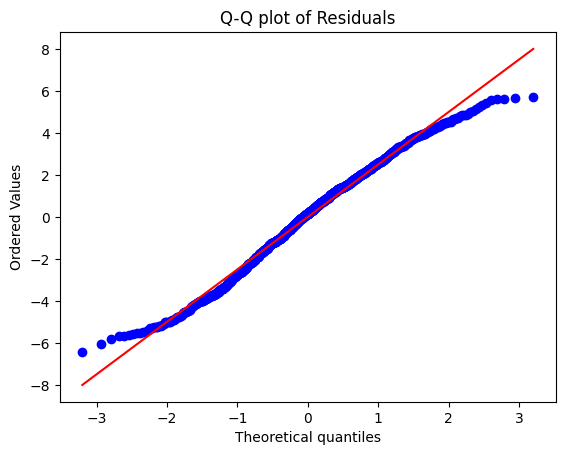

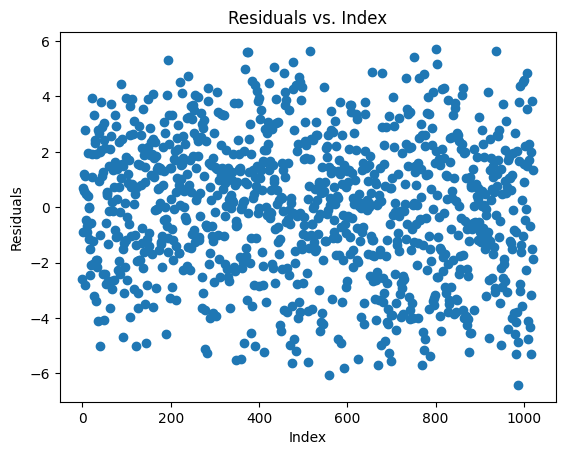

In [34]:
y = df[ 'flattery']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

## Results Rhetorical Question


                                OLS Regression Results                                
Dep. Variable:     device_rhetorical_question   R-squared:                       0.100
Model:                                    OLS   Adj. R-squared:                  0.087
Method:                         Least Squares   F-statistic:                     7.968
Date:                        Wed, 21 Jun 2023   Prob (F-statistic):           2.76e-16
Time:                                20:55:16   Log-Likelihood:                -2408.7
No. Observations:                        1022   AIC:                             4847.
Df Residuals:                            1007   BIC:                             4921.
Df Model:                                  14                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

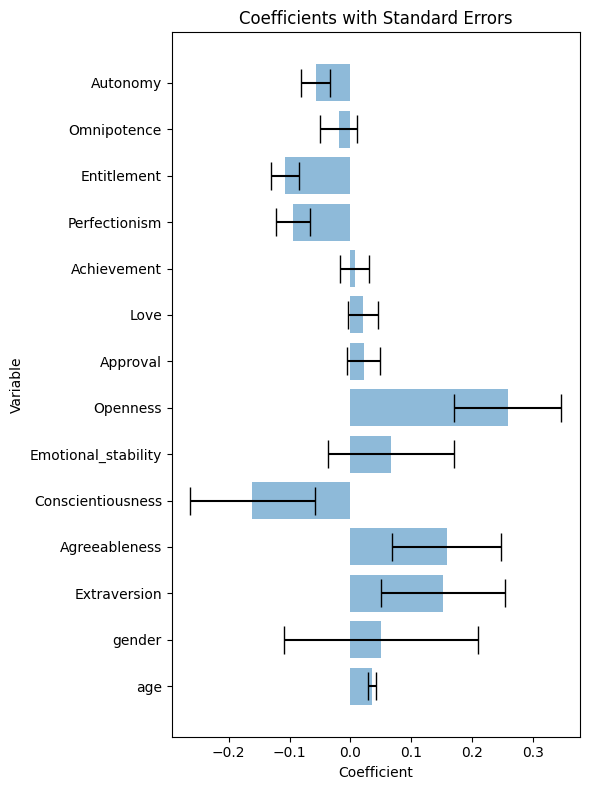

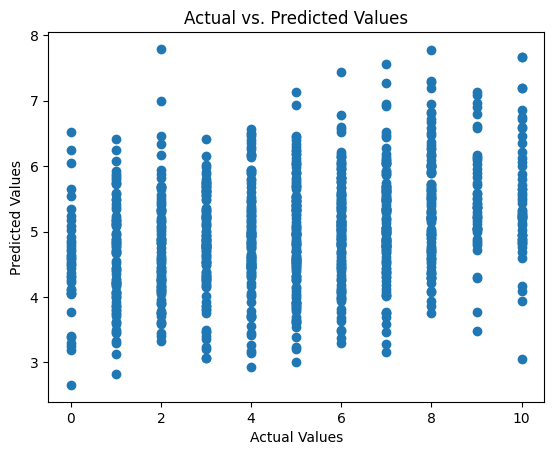

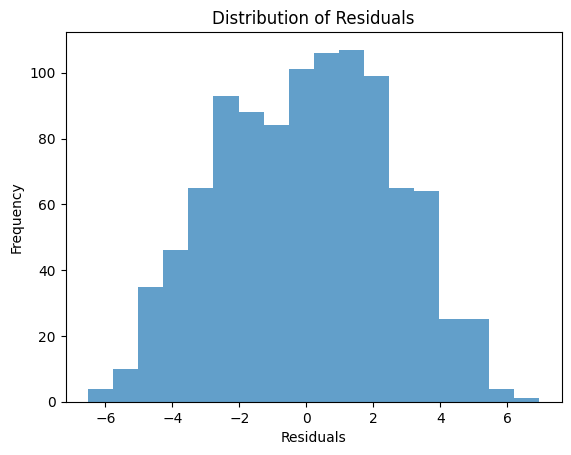

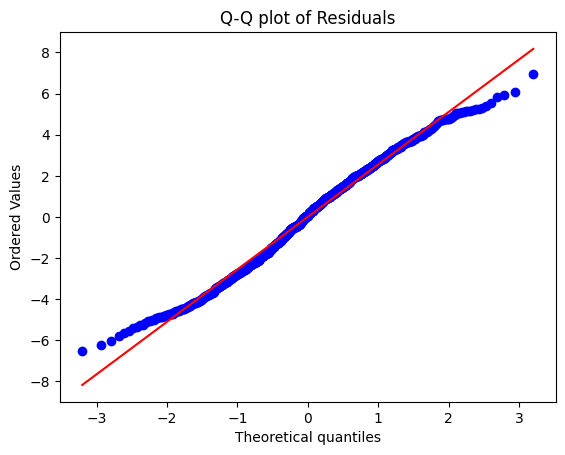

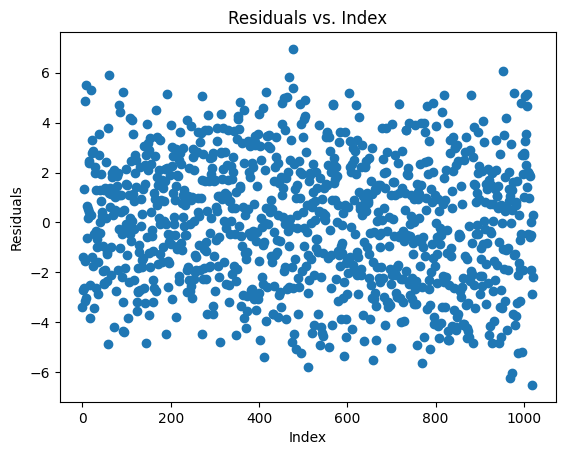

In [33]:
y = df[ 'device_rhetorical_question']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

## Results Epistrophe

                            OLS Regression Results                            
Dep. Variable:      device_epistrophe   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     6.863
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           1.38e-13
Time:                        20:52:19   Log-Likelihood:                -2311.3
No. Observations:                1022   AIC:                             4653.
Df Residuals:                    1007   BIC:                             4727.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.5353    

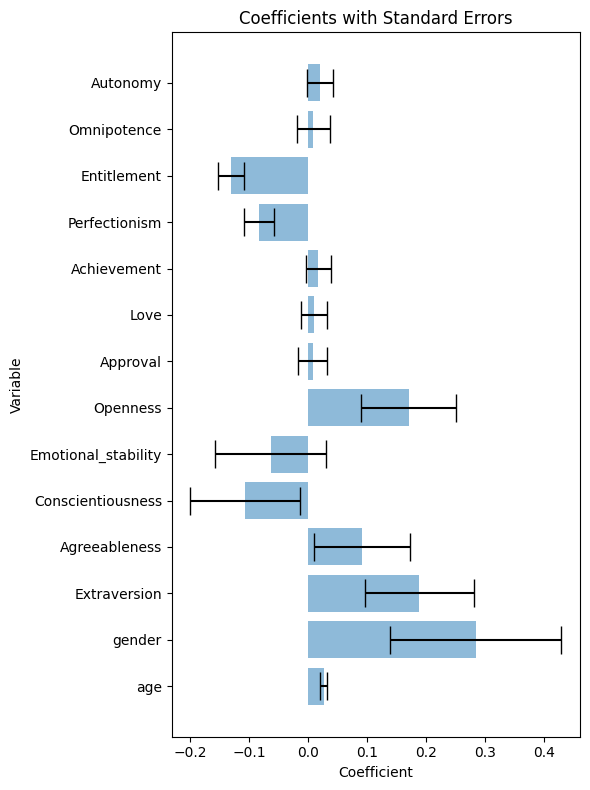

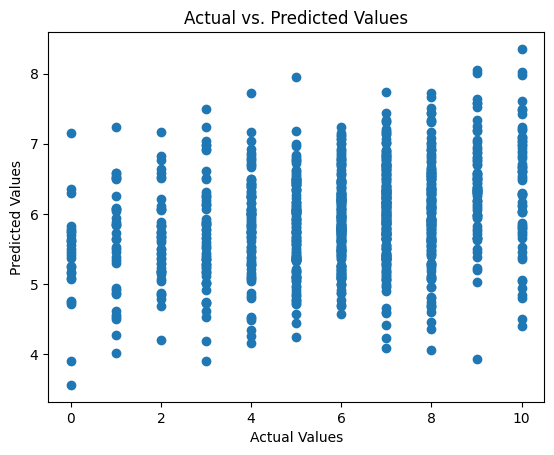

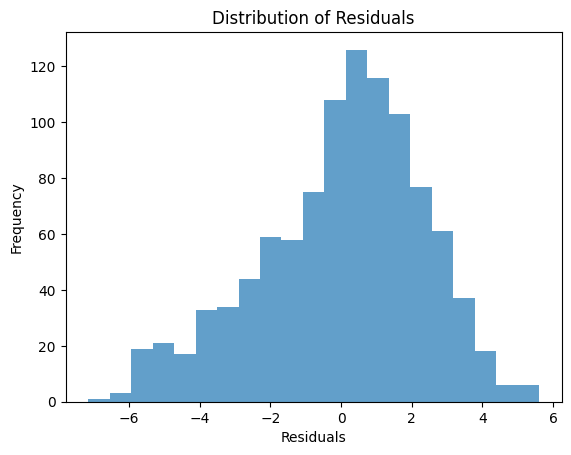

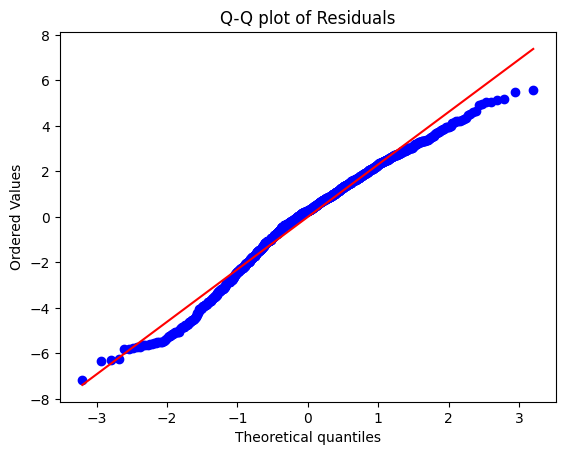

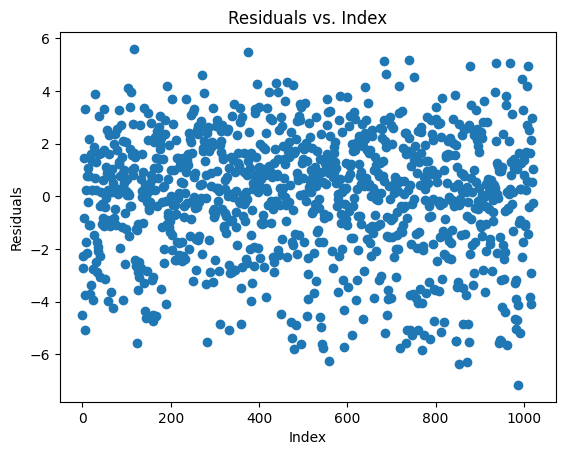

In [28]:
y = df['device_epistrophe']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

## Results Anaphora

                            OLS Regression Results                            
Dep. Variable:        device_anaphora   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     4.735
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           1.82e-08
Time:                        20:53:12   Log-Likelihood:                -2263.6
No. Observations:                1022   AIC:                             4557.
Df Residuals:                    1007   BIC:                             4631.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.0493    

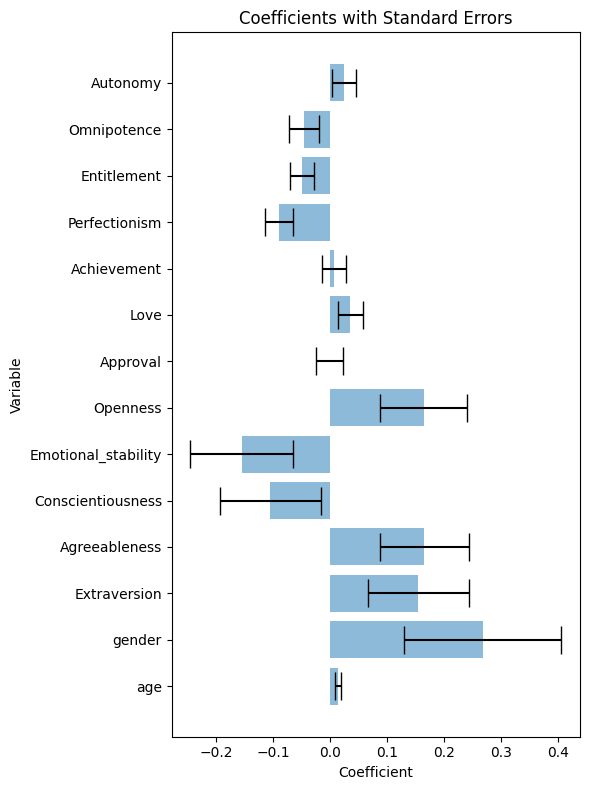

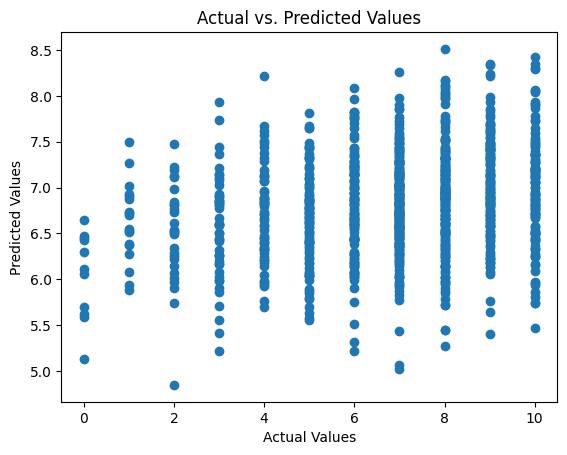

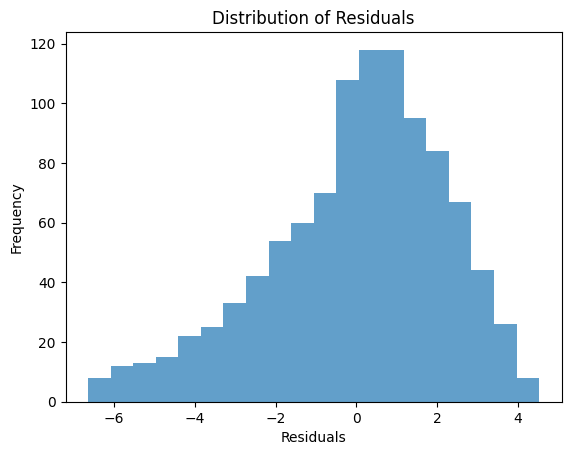

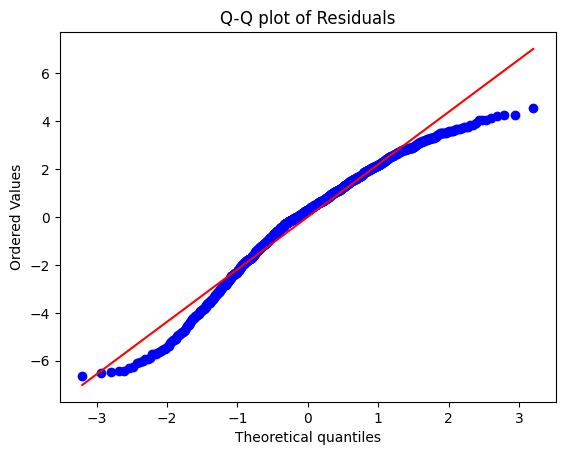

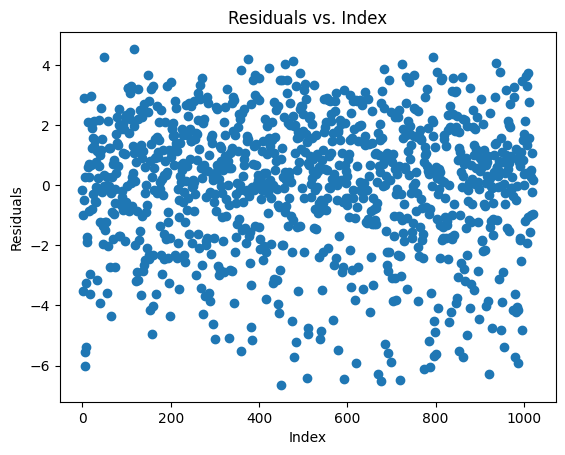

In [29]:
y = df['device_anaphora']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

## Results Antanagoge

                            OLS Regression Results                            
Dep. Variable:        device_anaphora   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     4.735
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           1.82e-08
Time:                        20:53:28   Log-Likelihood:                -2263.6
No. Observations:                1022   AIC:                             4557.
Df Residuals:                    1007   BIC:                             4631.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.0493    

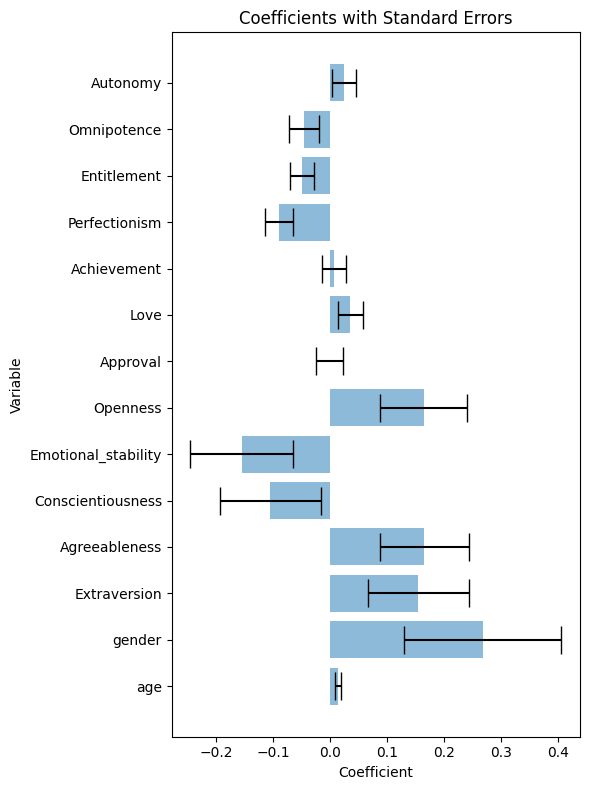

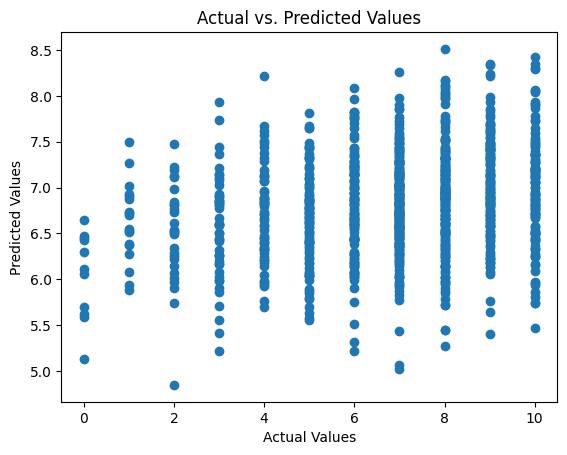

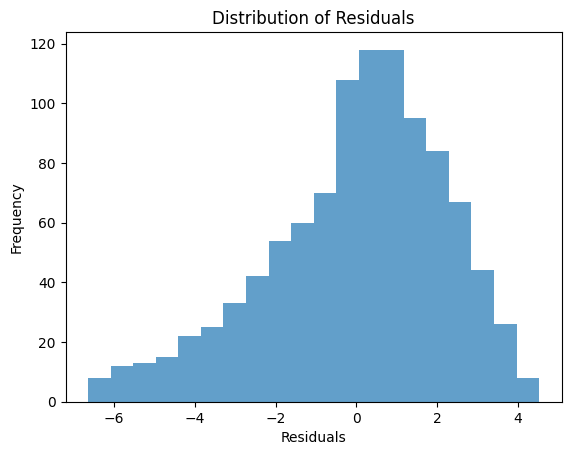

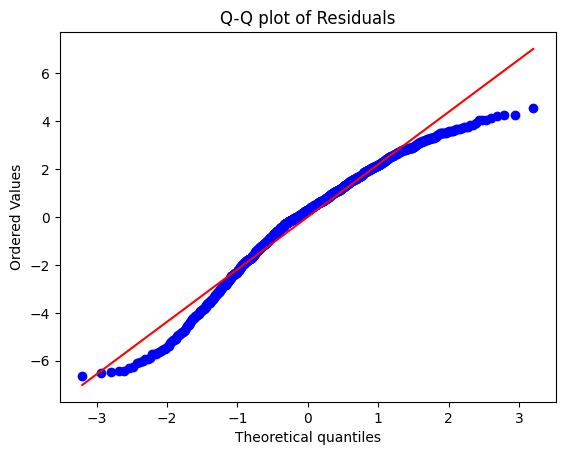

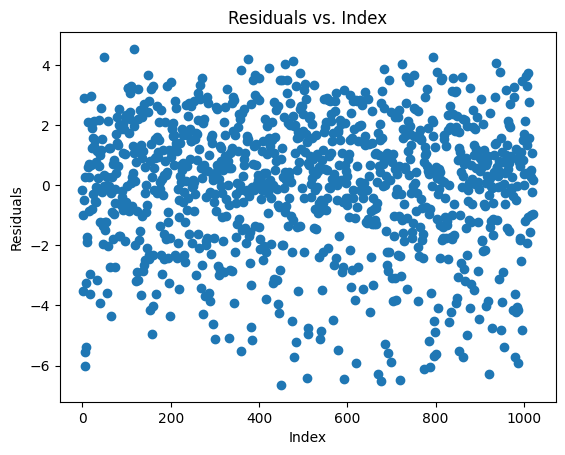

In [30]:
y = df['device_anaphora']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

## Result I. Superiority

                               OLS Regression Results                              
Dep. Variable:     Illusion_of_superiority   R-squared:                       0.084
Model:                                 OLS   Adj. R-squared:                  0.072
Method:                      Least Squares   F-statistic:                     6.628
Date:                     Wed, 21 Jun 2023   Prob (F-statistic):           5.19e-13
Time:                             20:53:41   Log-Likelihood:                -2489.5
No. Observations:                     1022   AIC:                             5009.
Df Residuals:                         1007   BIC:                             5083.
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

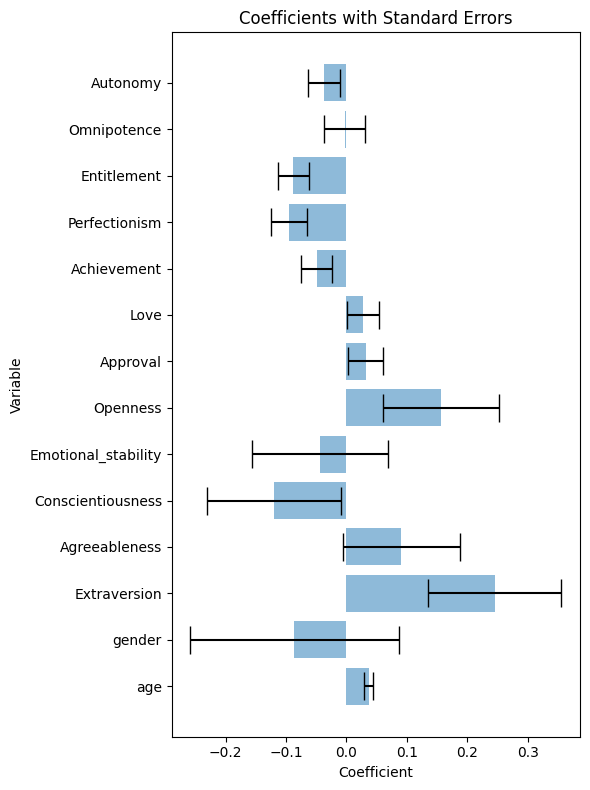

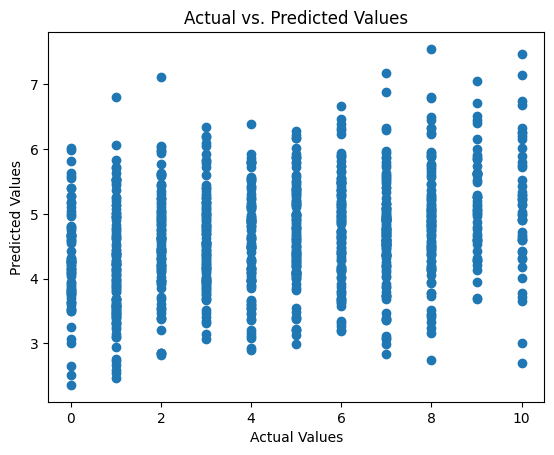

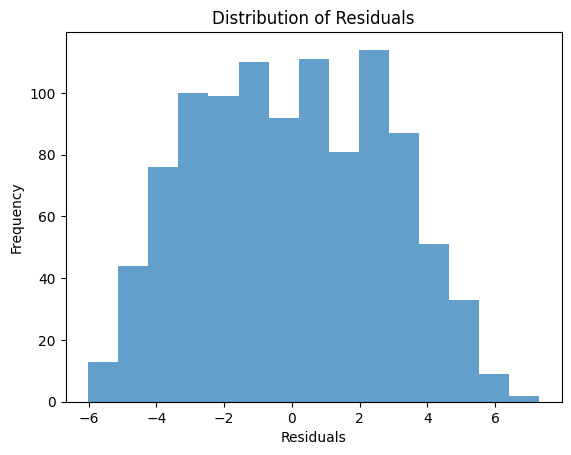

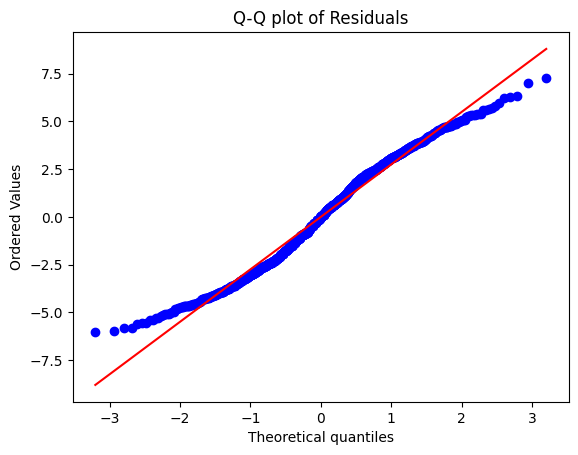

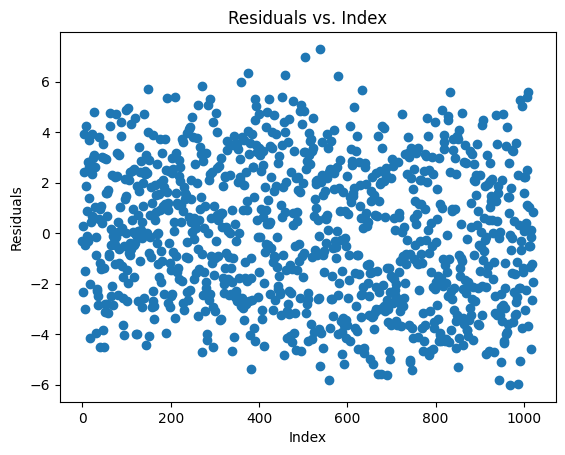

In [31]:
y = df['Illusion_of_superiority']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)